In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import arch

In [2]:
rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 100
rcParams['font.size'] = 12
rcParams["patch.force_edgecolor"] = True
sns.set()

In [3]:
pd.options.mode.chained_assignment = None

### Reading the Data

In [4]:
electric_data = pd.read_csv('4_Train_Data.csv')
electric_data.head()

UNIX Timestamp (seconds) Start Time (GMT-0800,PST) End Time (GMT-0800,PST)  \
0                1388851200              1/5/14 00:00            1/5/14 00:59   
1                1388854800              1/5/14 01:00            1/5/14 01:59   
2                1388858400              1/5/14 02:00            1/5/14 02:59   
3                1388862000              1/5/14 03:00            1/5/14 03:59   
4                1388865600              1/5/14 04:00            1/5/14 04:59   

   Bldg1 (kWh)  Bldg2 (kWh)  Bldg3 (kWh)  Bldg4 (kWh)  Bldg5 (kWh)  \
0         0.19         0.97         0.03         0.02         0.26   
1         0.19         0.83         0.10         0.02         0.26   
2         0.19         0.89         0.08         0.08         0.24   
3         0.19         0.83         0.03         0.02         0.17   
4         0.19         0.83         0.03         0.02         0.18   

   Bldg6 (kWh)  Bldg7 (kWh)      ...       Bldg14 (kWh)  Bldg15 (kWh)  \
0         1.47         0.10      ...               0.24          1.76   
1         1.48         0.20      ...               0.40          1.49   
2         1.45         0.10      ...               0.36          1.57   
3         1.45         0.18      ...               0.33          1.31   
4         1.69         0.14      ...               0.29          0.03   

   Bldg16 (kWh)  Bldg17 (kWh)  Bldg18 (kWh)  Bldg19 (kWh)  Bldg20 (kWh)  \
0          0.11          0.09          0.61          0.03          1.70   
1          0.06          0.10          0.77          0.03          1.78   
2          0.05          0.08          0.75          0.03          1.68   
3          0.06          0.13          0.34          0.02          1.70   
4          0.06          0.16          0.15          0.03          1.75   

   Bldg21 (kWh)  Bldg22 (kWh)  Bldg23 (kWh)  
0          3.23          0.14          0.99  
1          2.42          0.12          0.93  
2          2.31          0.13          0.47  
3          2.72          0.14          0.58  
4          0.69          0.11          0.44  

[5 rows x 26 columns]

### 1. Create a bar plot of average hourly energy consumption. 

In [5]:
#Create longitudinal Dataframe with one row per consumption per building for easier plotting
building_long_df = None
time_cols = ['Week of Year','Day of Week','Hour']
building_cols = [col for col in electric_data.columns if 'Bldg' in col]
for i,col in enumerate(building_cols):
    building_df = pd.DataFrame({'Consumption':electric_data[col]})
    building_df['Building'] = col
    if building_long_df is None:
        building_long_df = building_df
    else:
        building_long_df = building_long_df.append(building_df)

building_long_df.Building = building_long_df.Building.str.replace('Bldg|\(kWh\)','').astype(int)
building_long_df.head()

Consumption  Building
0         0.19         1
1         0.19         1
2         0.19         1
3         0.19         1
4         0.19         1

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


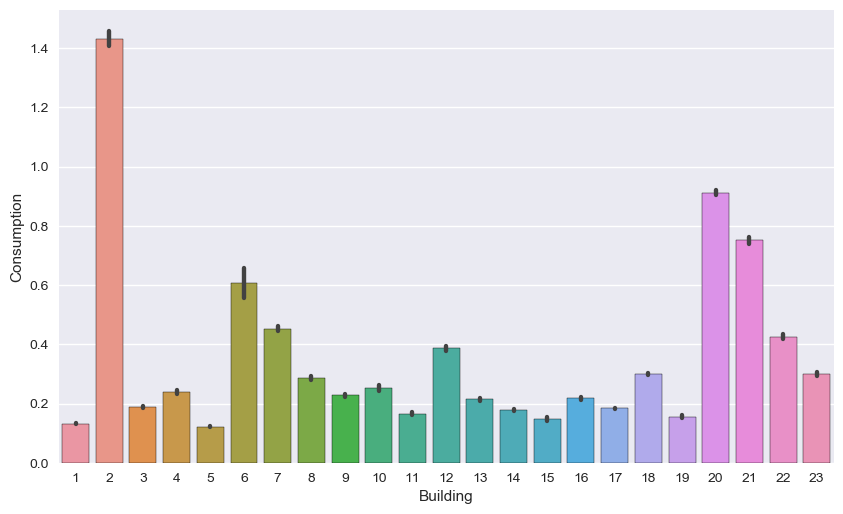

In [6]:
sns.barplot(x='Building',y='Consumption',data = building_long_df,estimator = np.mean)
plt.show()

### 2. Remove building with the highest variance

In [7]:
electric_data = electric_data.drop('Bldg6 (kWh)',axis=1)
electric_data.head()

UNIX Timestamp (seconds) Start Time (GMT-0800,PST) End Time (GMT-0800,PST)  \
0                1388851200              1/5/14 00:00            1/5/14 00:59   
1                1388854800              1/5/14 01:00            1/5/14 01:59   
2                1388858400              1/5/14 02:00            1/5/14 02:59   
3                1388862000              1/5/14 03:00            1/5/14 03:59   
4                1388865600              1/5/14 04:00            1/5/14 04:59   

   Bldg1 (kWh)  Bldg2 (kWh)  Bldg3 (kWh)  Bldg4 (kWh)  Bldg5 (kWh)  \
0         0.19         0.97         0.03         0.02         0.26   
1         0.19         0.83         0.10         0.02         0.26   
2         0.19         0.89         0.08         0.08         0.24   
3         0.19         0.83         0.03         0.02         0.17   
4         0.19         0.83         0.03         0.02         0.18   

   Bldg7 (kWh)  Bldg8 (kWh)      ...       Bldg14 (kWh)  Bldg15 (kWh)  \
0         0.10         0.10      ...               0.24          1.76   
1         0.20         0.11      ...               0.40          1.49   
2         0.10         0.11      ...               0.36          1.57   
3         0.18         0.11      ...               0.33          1.31   
4         0.14         0.09      ...               0.29          0.03   

   Bldg16 (kWh)  Bldg17 (kWh)  Bldg18 (kWh)  Bldg19 (kWh)  Bldg20 (kWh)  \
0          0.11          0.09          0.61          0.03          1.70   
1          0.06          0.10          0.77          0.03          1.78   
2          0.05          0.08          0.75          0.03          1.68   
3          0.06          0.13          0.34          0.02          1.70   
4          0.06          0.16          0.15          0.03          1.75   

   Bldg21 (kWh)  Bldg22 (kWh)  Bldg23 (kWh)  
0          3.23          0.14          0.99  
1          2.42          0.12          0.93  
2          2.31          0.13          0.47  
3          2.72          0.14          0.58  
4          0.69          0.11          0.44  

[5 rows x 25 columns]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


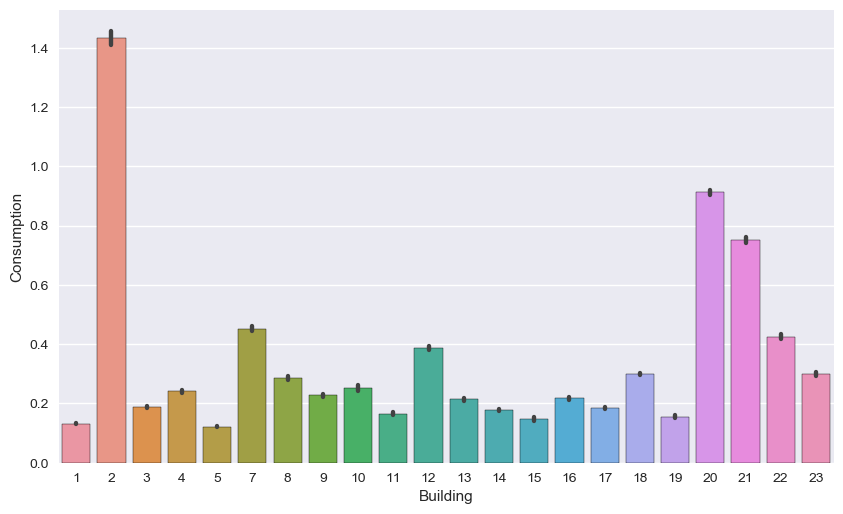

In [8]:
sns.barplot(x='Building',y='Consumption',
            data = building_long_df.loc[building_long_df.Building!=6],estimator = np.mean)
plt.show()

### 3.1 Reorganize data into 4D Array

In [9]:
building_reorganized_data =  electric_data.copy()
# Prepare datetime data
building_reorganized_data['Start Time (GMT-0800,PST)'] = pd.to_datetime(
        building_reorganized_data['Start Time (GMT-0800,PST)'])
building_reorganized_data['Week of Year'] = building_reorganized_data['Start Time (GMT-0800,PST)'].dt.weekofyear
building_reorganized_data['Day of Week'] = building_reorganized_data['Start Time (GMT-0800,PST)'].dt.dayofweek
building_reorganized_data['Hour'] = building_reorganized_data['Start Time (GMT-0800,PST)'].dt.hour
building_reorganized_data.head()

UNIX Timestamp (seconds) Start Time (GMT-0800,PST) End Time (GMT-0800,PST)  \
0                1388851200       2014-01-05 00:00:00            1/5/14 00:59   
1                1388854800       2014-01-05 01:00:00            1/5/14 01:59   
2                1388858400       2014-01-05 02:00:00            1/5/14 02:59   
3                1388862000       2014-01-05 03:00:00            1/5/14 03:59   
4                1388865600       2014-01-05 04:00:00            1/5/14 04:59   

   Bldg1 (kWh)  Bldg2 (kWh)  Bldg3 (kWh)  Bldg4 (kWh)  Bldg5 (kWh)  \
0         0.19         0.97         0.03         0.02         0.26   
1         0.19         0.83         0.10         0.02         0.26   
2         0.19         0.89         0.08         0.08         0.24   
3         0.19         0.83         0.03         0.02         0.17   
4         0.19         0.83         0.03         0.02         0.18   

   Bldg7 (kWh)  Bldg8 (kWh)  ...   Bldg17 (kWh)  Bldg18 (kWh)  Bldg19 (kWh)  \
0         0.10         0.10  ...           0.09          0.61          0.03   
1         0.20         0.11  ...           0.10          0.77          0.03   
2         0.10         0.11  ...           0.08          0.75          0.03   
3         0.18         0.11  ...           0.13          0.34          0.02   
4         0.14         0.09  ...           0.16          0.15          0.03   

   Bldg20 (kWh)  Bldg21 (kWh)  Bldg22 (kWh)  Bldg23 (kWh)  Week of Year  \
0          1.70          3.23          0.14          0.99             1   
1          1.78          2.42          0.12          0.93             1   
2          1.68          2.31          0.13          0.47             1   
3          1.70          2.72          0.14          0.58             1   
4          1.75          0.69          0.11          0.44             1   

   Day of Week  Hour  
0            6     0  
1            6     1  
2            6     2  
3            6     3  
4            6     4  

[5 rows x 28 columns]

In [10]:
building_cols = [col for col in building_reorganized_data.columns if 'Bldg' in col]
for col in building_cols:
    building_reorganized_data['Normalized_{}'.format(col)] = building_reorganized_data[col] / max(building_reorganized_data[col])
building_reorganized_data.head()

UNIX Timestamp (seconds) Start Time (GMT-0800,PST) End Time (GMT-0800,PST)  \
0                1388851200       2014-01-05 00:00:00            1/5/14 00:59   
1                1388854800       2014-01-05 01:00:00            1/5/14 01:59   
2                1388858400       2014-01-05 02:00:00            1/5/14 02:59   
3                1388862000       2014-01-05 03:00:00            1/5/14 03:59   
4                1388865600       2014-01-05 04:00:00            1/5/14 04:59   

   Bldg1 (kWh)  Bldg2 (kWh)  Bldg3 (kWh)  Bldg4 (kWh)  Bldg5 (kWh)  \
0         0.19         0.97         0.03         0.02         0.26   
1         0.19         0.83         0.10         0.02         0.26   
2         0.19         0.89         0.08         0.08         0.24   
3         0.19         0.83         0.03         0.02         0.17   
4         0.19         0.83         0.03         0.02         0.18   

   Bldg7 (kWh)  Bldg8 (kWh)           ...             Normalized_Bldg14 (kWh)  \
0         0.10         0.10           ...                            0.311688   
1         0.20         0.11           ...                            0.519481   
2         0.10         0.11           ...                            0.467532   
3         0.18         0.11           ...                            0.428571   
4         0.14         0.09           ...                            0.376623   

   Normalized_Bldg15 (kWh)  Normalized_Bldg16 (kWh)  Normalized_Bldg17 (kWh)  \
0                 0.530120                 0.037931                 0.058065   
1                 0.448795                 0.020690                 0.064516   
2                 0.472892                 0.017241                 0.051613   
3                 0.394578                 0.020690                 0.083871   
4                 0.009036                 0.020690                 0.103226   

   Normalized_Bldg18 (kWh)  Normalized_Bldg19 (kWh)  Normalized_Bldg20 (kWh)  \
0                 0.354651                 0.009524                 0.478873   
1                 0.447674                 0.009524                 0.501408   
2                 0.436047                 0.009524                 0.473239   
3                 0.197674                 0.006349                 0.478873   
4                 0.087209                 0.009524                 0.492958   

   Normalized_Bldg21 (kWh)  Normalized_Bldg22 (kWh)  Normalized_Bldg23 (kWh)  
0                 0.922857                 0.041543                 0.277311  
1                 0.691429                 0.035608                 0.260504  
2                 0.660000                 0.038576                 0.131653  
3                 0.777143                 0.041543                 0.162465  
4                 0.197143                 0.032641                 0.123249  

[5 rows x 50 columns]

In [11]:
normalized_cols = [col for col in building_reorganized_data.columns if 'Normalized' in col]
#Create new 4D dataframe by appending the data for each building.
normalized_df = None
time_cols = ['Start Time (GMT-0800,PST)','Week of Year','Day of Week','Hour']
for i,col in enumerate(normalized_cols):
    building = building_cols[i]
    building_df = building_reorganized_data[time_cols]
    building_df['Building'] = building
    building_df['Normalized_Energy_Consumption'] = building_reorganized_data[col]
    if normalized_df is None:
        normalized_df = building_df
    else:
        normalized_df = normalized_df.append(building_df)
normalized_df = normalized_df.sort_values(by = ['Week of Year','Building']).reset_index(drop=True)
normalized_date_df = normalized_df.copy()
normalized_df = normalized_df.drop('Start Time (GMT-0800,PST)',axis=1)
normalized_df.head()

Week of Year  Day of Week  Hour     Building  Normalized_Energy_Consumption
0             1            6     0  Bldg1 (kWh)                       0.234568
1             1            6     1  Bldg1 (kWh)                       0.234568
2             1            6     2  Bldg1 (kWh)                       0.234568
3             1            6     3  Bldg1 (kWh)                       0.234568
4             1            6     4  Bldg1 (kWh)                       0.234568

### 3.2 Figures plot

In [12]:
import matplotlib.patches as mpatches

Prepared 0 buildings
Prepared 5 buildings
Prepared 10 buildings
Prepared 15 buildings
Prepared 20 buildings


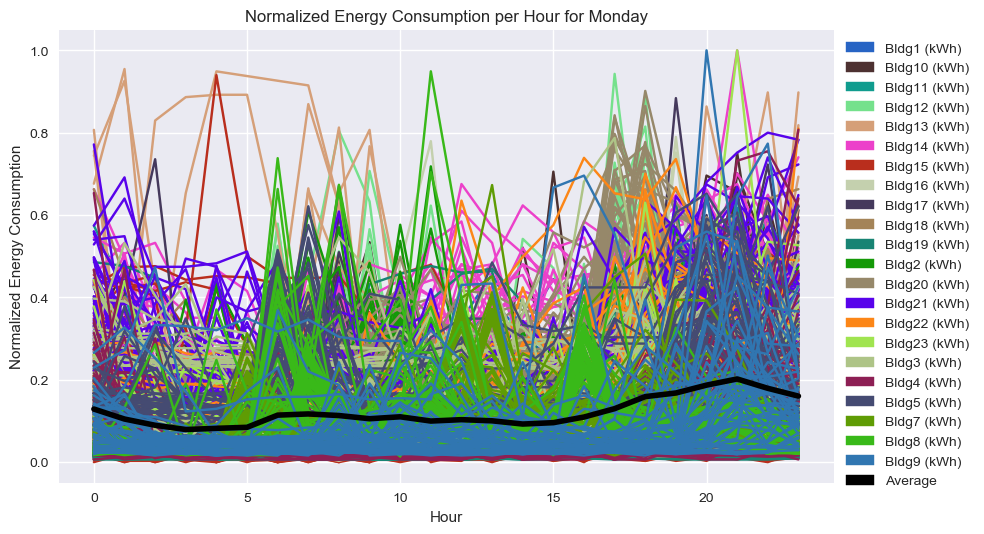

In [13]:
def Get_DOW_Plot(dow,name):
    #Plots normalized energy consumption per hour per building for a day of the week.
    
    normalized_x_axis = normalized_df.Hour.unique()
    dow =  dow
    np.random.seed(777)
    plot_buildings = normalized_df.Building.unique()
    colors = np.random.rand(3,len(plot_buildings))
    #Prepare plot for each building
    weeks = normalized_df['Week of Year'].unique()
    patch_list = list()
    for i,building in enumerate(plot_buildings):
        if i%5==0:
            print("Prepared {} buildings".format(i))
        for week in weeks:
            bar_data = normalized_df.loc[(normalized_df['Day of Week'] == dow) & (normalized_df['Building'] == building)
                                         & (normalized_df['Week of Year'] == week)]
            if bar_data.shape[0] == 0:
                bar_data = normalized_df.loc[(normalized_df['Day of Week'] == dow) & (normalized_df['Building'] == building)]
            hour_average = bar_data.groupby('Hour').mean()['Normalized_Energy_Consumption']
            plt.plot(normalized_x_axis,hour_average,c=colors[:,i])
        patch_list.append(mpatches.Patch(color=colors[:,i],label=building))

    #Prepare average plot
    dw_data = normalized_df.loc[normalized_df['Day of Week'] == dow]
    hour_dow_average = dw_data.groupby('Hour').mean()['Normalized_Energy_Consumption']
    plt.plot(normalized_x_axis,hour_dow_average,c='black',linewidth=4)
    patch_list.append(mpatches.Patch(color='black',label='Average'))
    plt.legend(handles=patch_list,bbox_to_anchor=(1, 1))
    
    plt.ylabel('Normalized Energy Consumption')
    plt.xlabel('Hour')
    plt.title('Normalized Energy Consumption per Hour for {}'.format(name))
    plt.show()
Get_DOW_Plot(0,'Monday')

Prepared 0 buildings
Prepared 5 buildings
Prepared 10 buildings
Prepared 15 buildings
Prepared 20 buildings


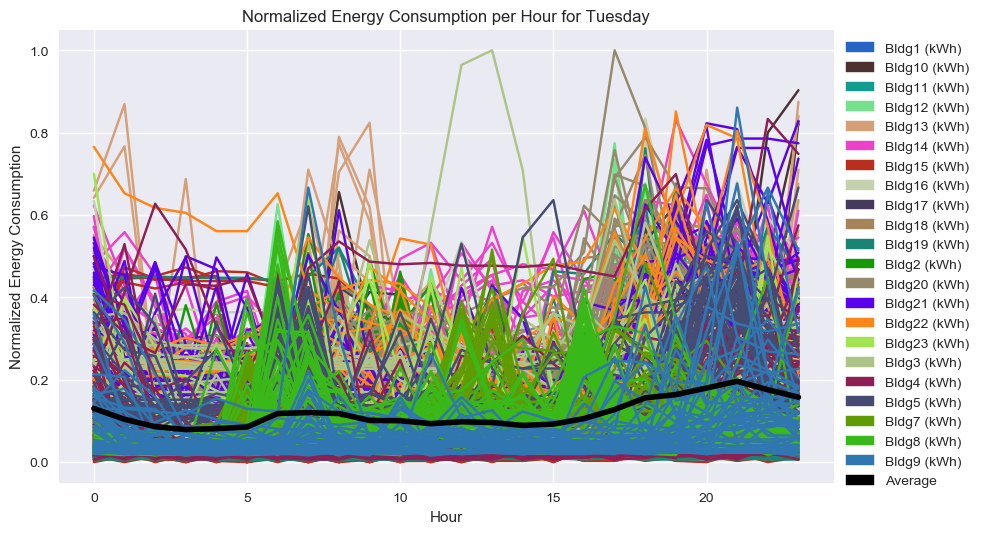

In [14]:
Get_DOW_Plot(1,'Tuesday')

Prepared 0 buildings
Prepared 5 buildings
Prepared 10 buildings
Prepared 15 buildings
Prepared 20 buildings


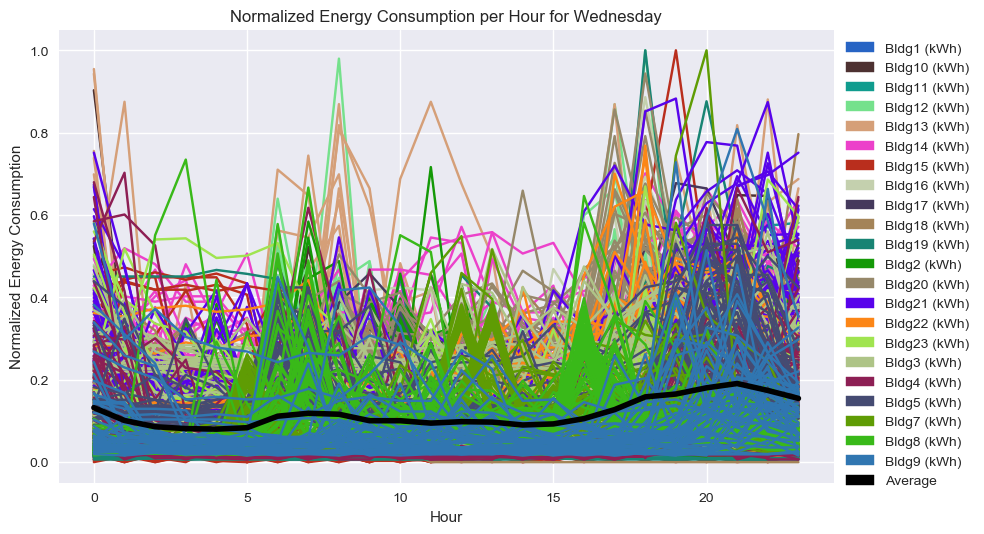

In [15]:
Get_DOW_Plot(2,'Wednesday')

Prepared 0 buildings
Prepared 5 buildings
Prepared 10 buildings
Prepared 15 buildings
Prepared 20 buildings


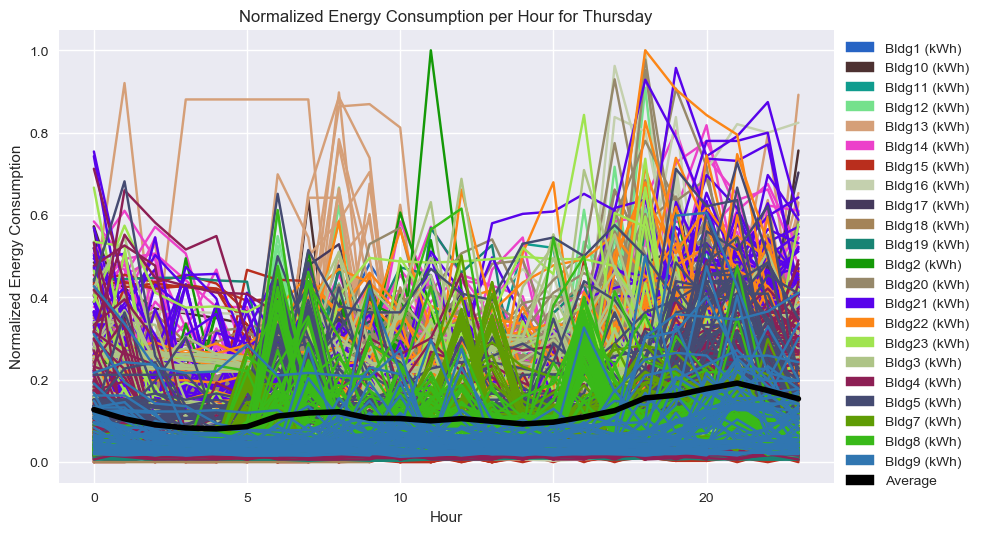

In [16]:
Get_DOW_Plot(3,'Thursday')

Prepared 0 buildings
Prepared 5 buildings
Prepared 10 buildings
Prepared 15 buildings
Prepared 20 buildings


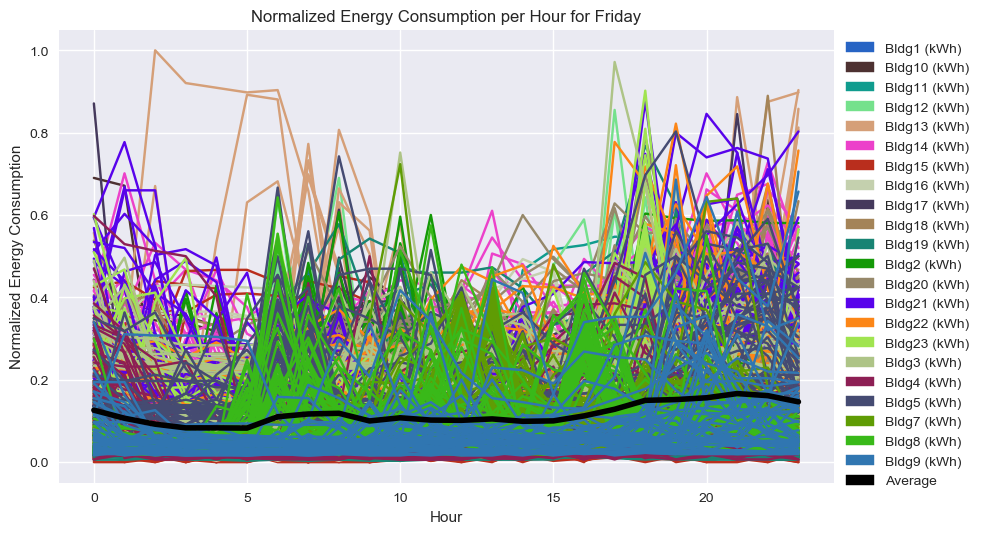

In [17]:
Get_DOW_Plot(4,'Friday')

Prepared 0 buildings
Prepared 5 buildings
Prepared 10 buildings
Prepared 15 buildings
Prepared 20 buildings


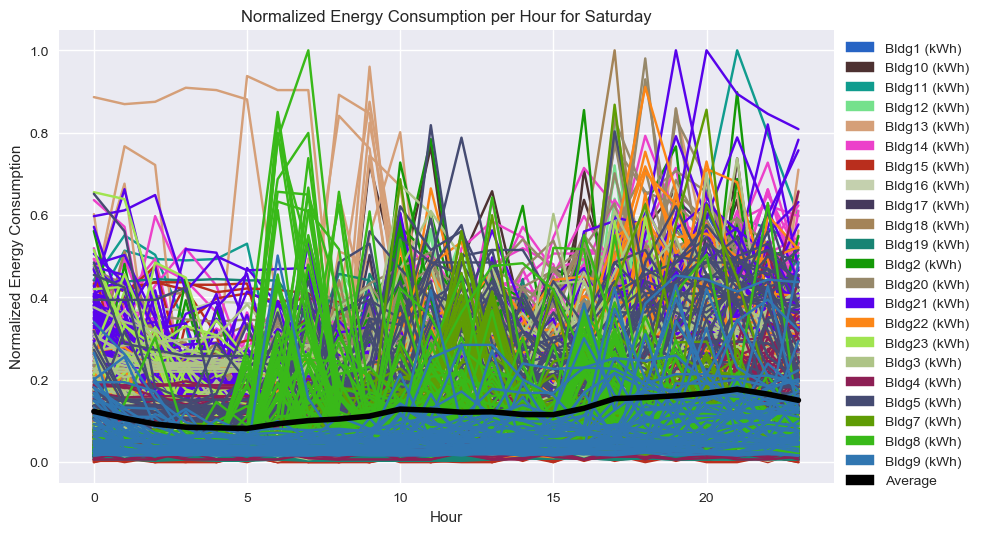

In [18]:
Get_DOW_Plot(5,'Saturday')

Prepared 0 buildings
Prepared 5 buildings
Prepared 10 buildings
Prepared 15 buildings
Prepared 20 buildings


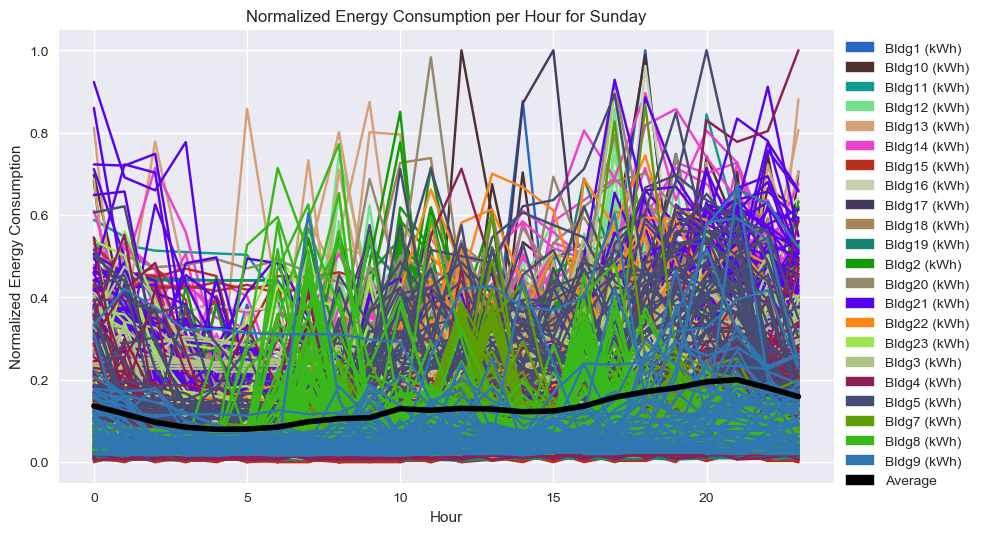

In [19]:
Get_DOW_Plot(6,'Sunday')

### 4. Previous Steps but with the test data

In [20]:
test_data = pd.read_excel('4_Test_Data.xlsx')
test_data.head()

TestTime  TestBldg
0 2014-09-07 00:00:00  0.094276
1 2014-09-07 01:00:00  0.037037
2 2014-09-07 02:00:00  0.040404
3 2014-09-07 03:00:00  0.037037
4 2014-09-07 04:00:00  0.037037

In [21]:
test_data['TestTime'] = pd.to_datetime(
        test_data['TestTime'])
test_data['Week of Year'] = test_data['TestTime'].dt.weekofyear
test_data['Day of Week'] = test_data['TestTime'].dt.dayofweek
test_data['Hour'] = test_data['TestTime'].dt.hour
test_data.head()

TestTime  TestBldg  Week of Year  Day of Week  Hour
0 2014-09-07 00:00:00  0.094276            36            6     0
1 2014-09-07 01:00:00  0.037037            36            6     1
2 2014-09-07 02:00:00  0.040404            36            6     2
3 2014-09-07 03:00:00  0.037037            36            6     3
4 2014-09-07 04:00:00  0.037037            36            6     4

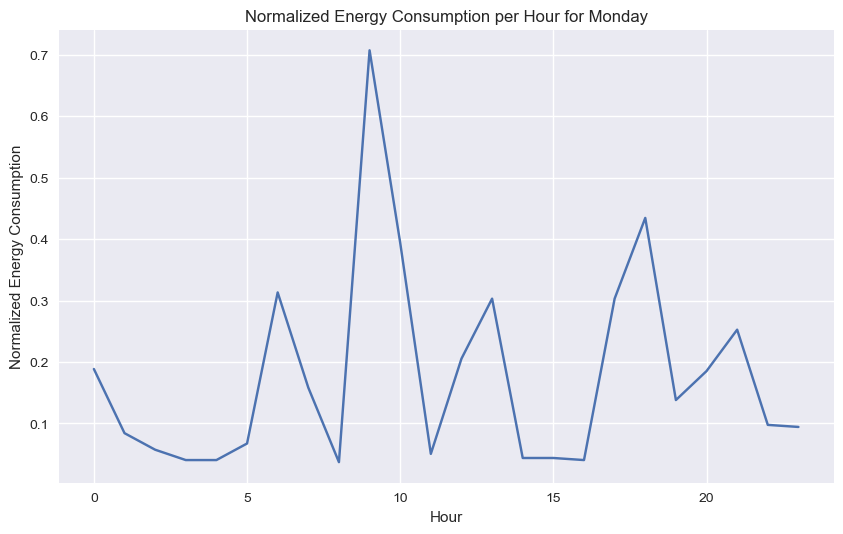

In [22]:
def Get_Test_Normalized_Energy(dow,name):
    hour = test_data.Hour.unique()
    energy = test_data.loc[test_data['Day of Week'] == dow].groupby('Hour').mean()['TestBldg']
    plt.plot(hour,energy)
    plt.xlabel('Hour')
    plt.ylabel('Normalized Energy Consumption')
    plt.title('Normalized Energy Consumption per Hour for {}'.format(name))
    plt.show()
Get_Test_Normalized_Energy(0,'Monday')

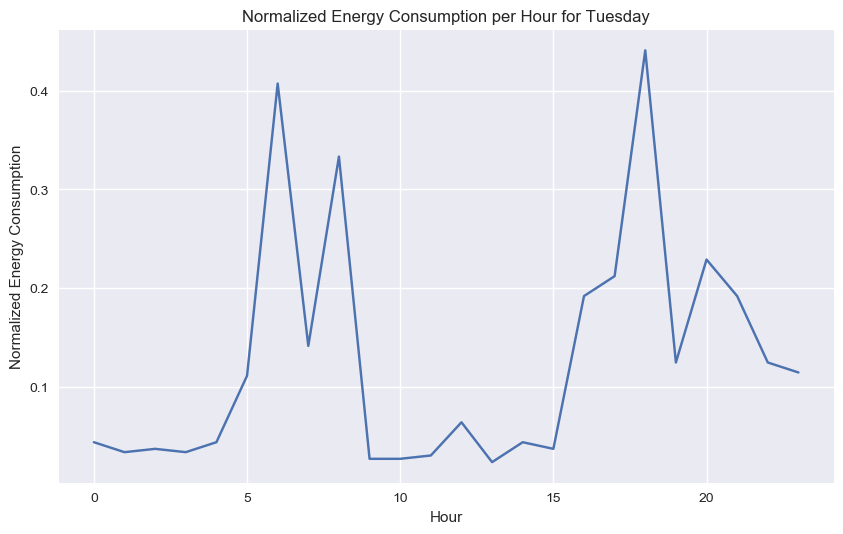

In [23]:
Get_Test_Normalized_Energy(1,'Tuesday')

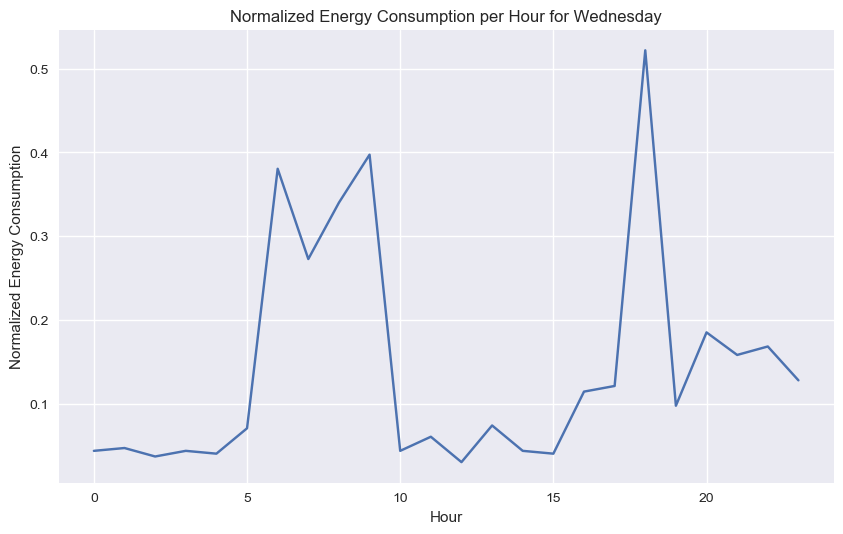

In [24]:
Get_Test_Normalized_Energy(2,'Wednesday')

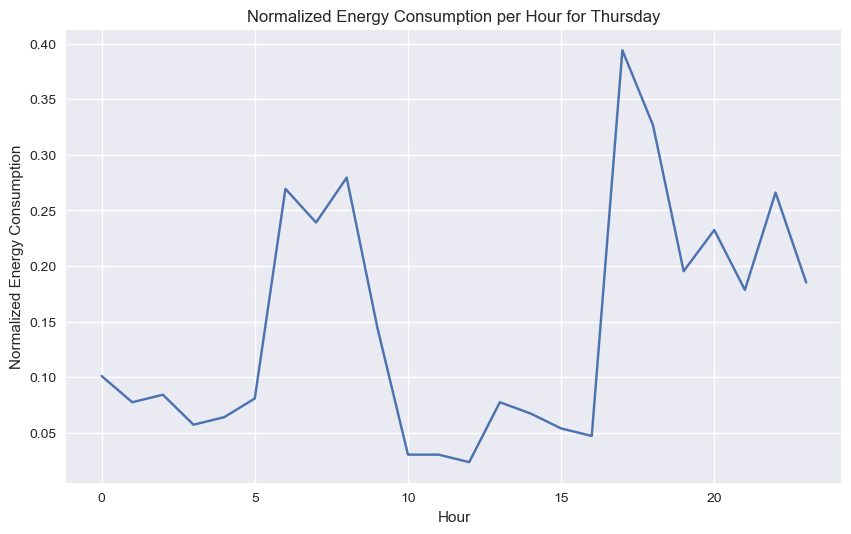

In [25]:
Get_Test_Normalized_Energy(3,'Thursday')

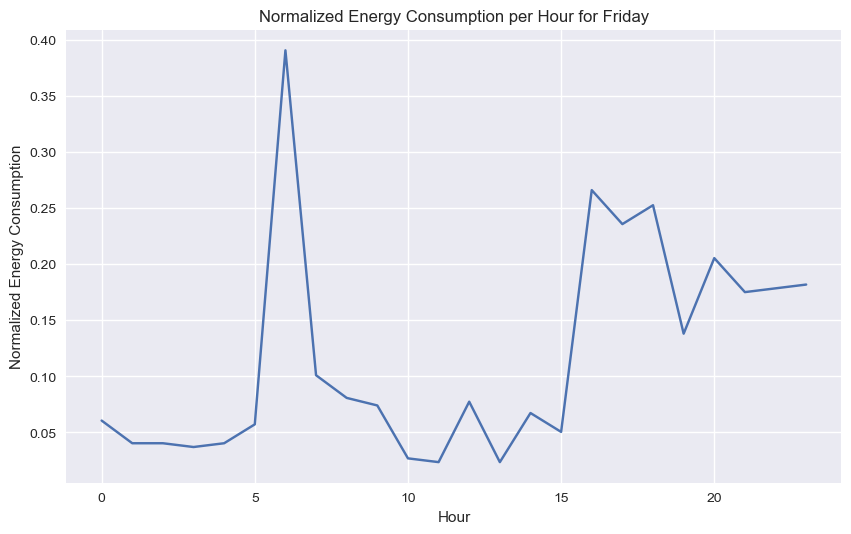

In [26]:
Get_Test_Normalized_Energy(4,'Friday')

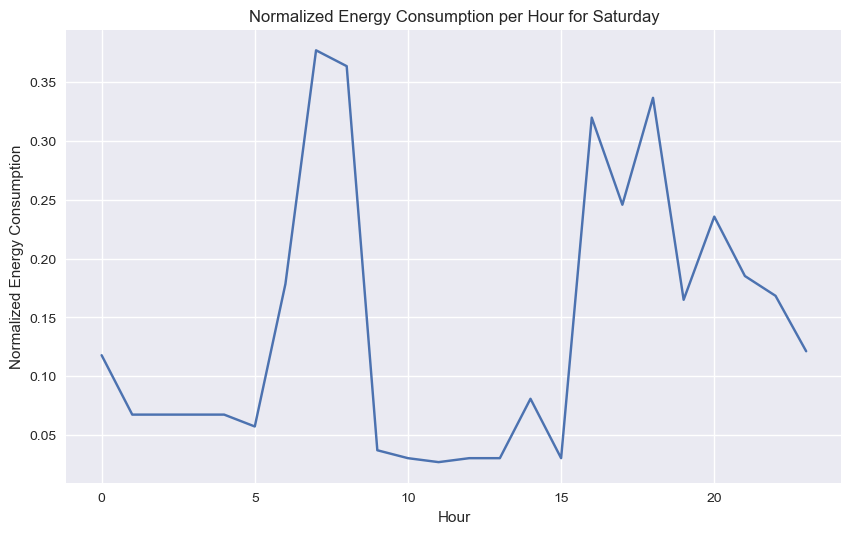

In [27]:
Get_Test_Normalized_Energy(5,'Saturday')

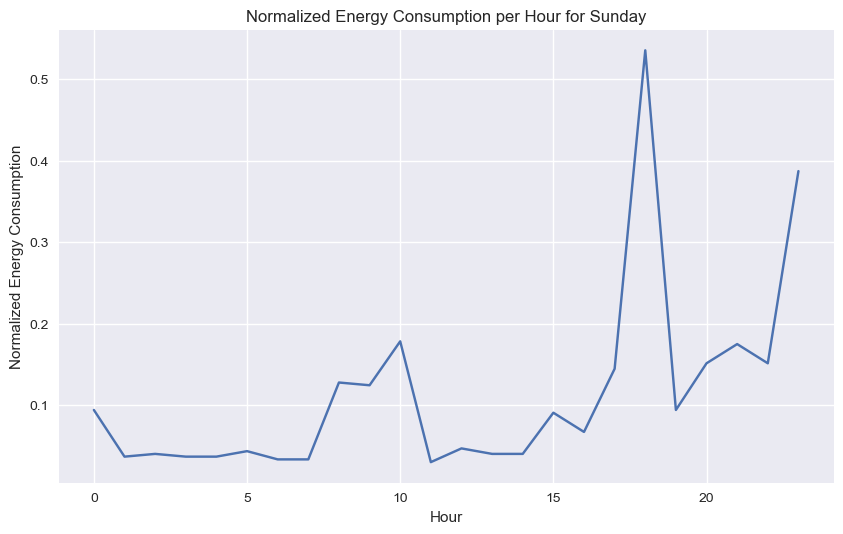

In [28]:
Get_Test_Normalized_Energy(6,'Sunday')

### 5. Calculate Mean Absolute Error 

In [29]:
# Prepare training data
day_hour_average = normalized_df.groupby(['Day of Week','Hour']).mean().reset_index()[['Day of Week','Hour'
                                                                                       ,'Normalized_Energy_Consumption']]
day_hour_average.head()

Day of Week  Hour  Normalized_Energy_Consumption
0            0     0                       0.128927
1            0     1                       0.104638
2            0     2                       0.089523
3            0     3                       0.079197
4            0     4                       0.082080

In [30]:
test_data['Prediction'] = np.nan
test_data.head()

TestTime  TestBldg  Week of Year  Day of Week  Hour  Prediction
0 2014-09-07 00:00:00  0.094276            36            6     0         NaN
1 2014-09-07 01:00:00  0.037037            36            6     1         NaN
2 2014-09-07 02:00:00  0.040404            36            6     2         NaN
3 2014-09-07 03:00:00  0.037037            36            6     3         NaN
4 2014-09-07 04:00:00  0.037037            36            6     4         NaN

In [31]:
## Replace predictions with averages for hour and day of week
for _,row in day_hour_average.iterrows():
    dow = row['Day of Week']
    hour = row['Hour']
    test_data.loc[(test_data['Day of Week'] == dow) &
                  (test_data['Hour'] == hour),'Prediction'] = row['Normalized_Energy_Consumption']
test_data.head()

TestTime  TestBldg  Week of Year  Day of Week  Hour  Prediction
0 2014-09-07 00:00:00  0.094276            36            6     0    0.136458
1 2014-09-07 01:00:00  0.037037            36            6     1    0.117043
2 2014-09-07 02:00:00  0.040404            36            6     2    0.096780
3 2014-09-07 03:00:00  0.037037            36            6     3    0.084526
4 2014-09-07 04:00:00  0.037037            36            6     4    0.079652

In [32]:
from sklearn.metrics import mean_absolute_error
def Get_MAE_For_Prediction(pred_column,test_data):
    mae_list = list()
    for dow in test_data['Day of Week'].unique():
        dow_test = test_data.loc[test_data['Day of Week'] == dow]
        mae_list.append(mean_absolute_error(dow_test.TestBldg,dow_test[pred_column]))
    
    mae_list.append(mean_absolute_error(test_data.TestBldg,test_data[pred_column]))
    return mae_list

In [33]:
MAE_list = Get_MAE_For_Prediction('Prediction',test_data)
MAE_rows = list(test_data['Day of Week'].unique()) + ['Whole Week']
MAE_df = pd.DataFrame({'Day of Week':MAE_rows,
                      'Average_MAE':MAE_list})

MAE_df

Average_MAE Day of Week
0     0.072854           6
1     0.108930           0
2     0.079239           1
3     0.084258           2
4     0.067724           3
5     0.062153           4
6     0.079013           5
7     0.079167  Whole Week

In [34]:
normalized_date_df.rename(columns={'Start Time (GMT-0800,PST)':'Date'},inplace=True)

In [35]:
average_normalized_df = normalized_date_df.groupby(['Week of Year','Day of Week','Hour','Date']).mean().reset_index()
average_normalized_df.head()

Week of Year  Day of Week  Hour                Date  \
0             1            6     0 2014-01-05 00:00:00   
1             1            6     1 2014-01-05 01:00:00   
2             1            6     2 2014-01-05 02:00:00   
3             1            6     3 2014-01-05 03:00:00   
4             1            6     4 2014-01-05 04:00:00   

   Normalized_Energy_Consumption  
0                       0.184008  
1                       0.182810  
2                       0.170045  
3                       0.155630  
4                       0.104664

In [36]:
average_normalized_df = average_normalized_df.set_index('Date')
average_normalized_df.head()

Week of Year  Day of Week  Hour  \
Date                                                   
2014-01-05 00:00:00             1            6     0   
2014-01-05 01:00:00             1            6     1   
2014-01-05 02:00:00             1            6     2   
2014-01-05 03:00:00             1            6     3   
2014-01-05 04:00:00             1            6     4   

                     Normalized_Energy_Consumption  
Date                                                
2014-01-05 00:00:00                       0.184008  
2014-01-05 01:00:00                       0.182810  
2014-01-05 02:00:00                       0.170045  
2014-01-05 03:00:00                       0.155630  
2014-01-05 04:00:00                       0.104664

In [37]:
from arch.univariate import ARX
exogenous_df = average_normalized_df.drop('Normalized_Energy_Consumption',axis=1)
y = average_normalized_df.Normalized_Energy_Consumption
ARX_model = ARX(y=y,lags=[1,5,22])
result = ARX_model.fit()

In [38]:
result.summary

<bound method ARCHModelResult.summary of                            AR - Constant Variance Model Results                          
Dep. Variable:     Normalized_Energy_Consumption   R-squared:                       0.774
Mean Model:                                   AR   Adj. R-squared:                  0.774
Vol Model:                     Constant Variance   Log-Likelihood:                21797.1
Distribution:                             Normal   AIC:                          -43584.2
Method:                       Maximum Likelihood   BIC:                          -43548.9
                                                   No. Observations:                 8546
Date:                           Wed, Apr 04 2018   Df Residuals:                     8541
Time:                                   21:13:38   Df Model:                            5
                                    Mean Model                                    
                     coef    std err          t      P>|t|        

In [39]:
test_data.TestTime.min()

Timestamp('2014-09-07 00:00:00')

In [40]:
fc = result.forecast(start=test_data.TestTime.min())
forecast_mean = fc.mean.reset_index()
forecast_mean = forecast_mean[pd.notnull(forecast_mean['h.1'])]
forecast_mean.rename(columns={'h.1':'ARX_Prediction'},inplace=True)

In [41]:
test_data_ARX = test_data.merge(forecast_mean,left_on='TestTime',right_on='Date').drop('Date',axis=1)
test_data_ARX.head()

TestTime  TestBldg  Week of Year  Day of Week  Hour  Prediction  \
0 2014-09-07 00:00:00  0.094276            36            6     0    0.136458   
1 2014-09-07 01:00:00  0.037037            36            6     1    0.117043   
2 2014-09-07 02:00:00  0.040404            36            6     2    0.096780   
3 2014-09-07 03:00:00  0.037037            36            6     3    0.084526   
4 2014-09-07 04:00:00  0.037037            36            6     4    0.079652   

   ARX_Prediction  
0        0.110418  
1        0.102894  
2        0.092355  
3        0.094121  
4        0.091851

In [42]:
ARX_mae_list = Get_MAE_For_Prediction('ARX_Prediction',test_data_ARX)
MAE_df['ARX_MAE'] = ARX_mae_list
MAE_df

Average_MAE Day of Week   ARX_MAE
0     0.072854           6  0.073498
1     0.108930           0  0.104585
2     0.079239           1  0.072737
3     0.084258           2  0.083753
4     0.067724           3  0.070760
5     0.062153           4  0.056121
6     0.079013           5  0.082752
7     0.079167  Whole Week  0.077744

In [43]:
train_data = normalized_date_df
train_data['timeKey'] = train_data['Day of Week'].astype(str) + train_data['Hour'].astype(str)
train_data.head()

Date  Week of Year  Day of Week  Hour     Building  \
0 2014-01-05 00:00:00             1            6     0  Bldg1 (kWh)   
1 2014-01-05 01:00:00             1            6     1  Bldg1 (kWh)   
2 2014-01-05 02:00:00             1            6     2  Bldg1 (kWh)   
3 2014-01-05 03:00:00             1            6     3  Bldg1 (kWh)   
4 2014-01-05 04:00:00             1            6     4  Bldg1 (kWh)   

   Normalized_Energy_Consumption timeKey  
0                       0.234568      60  
1                       0.234568      61  
2                       0.234568      62  
3                       0.234568      63  
4                       0.234568      64

In [44]:
average_data = train_data.groupby(['Day of Week','Hour']).mean().reset_index()[['Day of Week','Hour'
                                                                                ,'Normalized_Energy_Consumption']]
average_data['Key'] = average_data['Day of Week'].astype(str) + average_data['Hour'].astype(str)
average_data_dict = {row['Key']:row['Normalized_Energy_Consumption'] for index,row in average_data.iterrows() }

### 6. Neural Network

In [45]:
import NN_model as nn

In [46]:
network = nn.Network(train_data,average_data_dict,epochs = 3)
#Linear Layer 
llayer = nn.LinearLayer(Weights = (3,1),optimizer= nn.SGD(0.01))
network.layers.append(llayer)

#Activation Layer 
activation = nn.ActivationLayer(activation= nn.TanH())
network.layers.append(activation)
#Output Layer
output = nn.Output_Layer()
network.layers.append(output)

network.Train()

Epoch 1
Weights: [[0.]
 [0.]
 [0.]]
Epoch 2
Weights: [[-0.0062722 ]
 [ 0.03968321]
 [ 0.25604235]]
Epoch 3
Weights: [[-0.00515305]
 [ 0.03258119]
 [ 0.26226216]]


In [47]:
def Create_Predictions(network,data,average_data,target='Normalized_Energy_Consumption',date_col='TestTime'):
        predictions = []
        for i in range(4):
            key = data['timeKey'][i + 4]
            average_value = average_data[key]
            predictions.append(average_value)
            
        for i in range(data.shape[0] - 4):
                x_batch = data[target][i:i + 3].values.reshape(-1, 1)
                y_batch = data[target][i + 4]
                forward = network.layers[0].forward(x_batch)
                # Forward
                for l in range(1, len(network.layers) - 1):
                    forward = network.layers[l].forward(forward)

                # Calculate average value for current time period.
                key = data['timeKey'][i + 4]
                average_value = average_data[key]

                # Final prediction
                final_forward = network.layers[-1].forward(forward, y_batch, average_value)
                predictions.append(final_forward[0][0])
                
        return predictions

In [48]:
test_data_NNET = test_data_ARX.copy()
test_data_NNET['timeKey'] = test_data_NNET['Day of Week'].astype(str) + test_data_NNET['Hour'].astype(str)
test_data_NNET['NNET_Pred'] = Create_Predictions(network,test_data_NNET,average_data_dict,'TestBldg')
test_data_NNET.head()

TestTime  TestBldg  Week of Year  Day of Week  Hour  Prediction  \
0 2014-09-07 00:00:00  0.094276            36            6     0    0.136458   
1 2014-09-07 01:00:00  0.037037            36            6     1    0.117043   
2 2014-09-07 02:00:00  0.040404            36            6     2    0.096780   
3 2014-09-07 03:00:00  0.037037            36            6     3    0.084526   
4 2014-09-07 04:00:00  0.037037            36            6     4    0.079652   

   ARX_Prediction timeKey  NNET_Pred  
0        0.110418      60   0.079652  
1        0.102894      61   0.080324  
2        0.092355      62   0.084918  
3        0.094121      63   0.098059  
4        0.091851      64   0.090993

In [49]:
NNET_mae_list = Get_MAE_For_Prediction('NNET_Pred',test_data_NNET)
MAE_df['NNET_MAE'] = NNET_mae_list
MAE_df

Average_MAE Day of Week   ARX_MAE  NNET_MAE
0     0.072854           6  0.073498  0.084674
1     0.108930           0  0.104585  0.136507
2     0.079239           1  0.072737  0.092657
3     0.084258           2  0.083753  0.103524
4     0.067724           3  0.070760  0.077609
5     0.062153           4  0.056121  0.078457
6     0.079013           5  0.082752  0.097159
7     0.079167  Whole Week  0.077744  0.095798

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


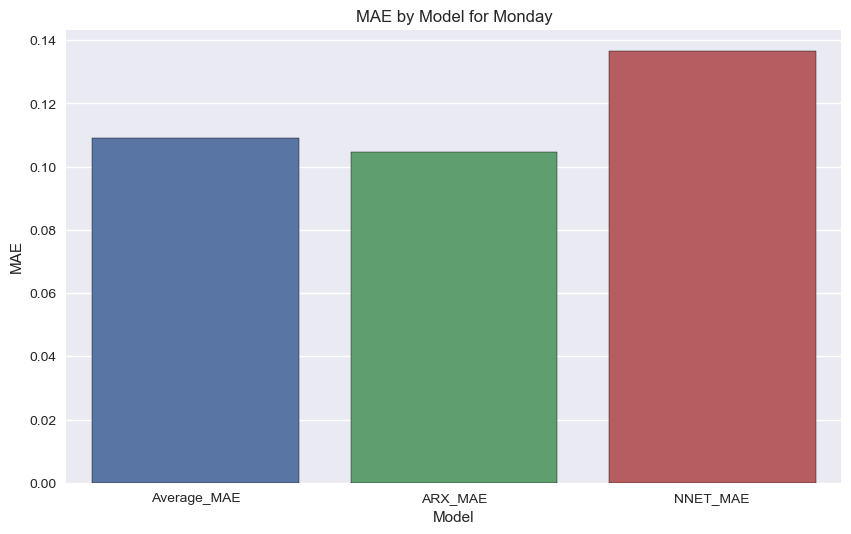

In [50]:
def Plot_MAE(dow,name,MAE_df):
    plot_cols = ['Average_MAE','ARX_MAE','NNET_MAE']
    dow_df = MAE_df.loc[MAE_df['Day of Week'] == dow][plot_cols]
    sns.barplot(x=plot_cols,y=dow_df.values.reshape(3,))
    plt.xlabel('Model')
    plt.ylabel('MAE')
    plt.title('MAE by Model for {}'.format(name))
    plt.show()

Plot_MAE(0,'Monday',MAE_df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


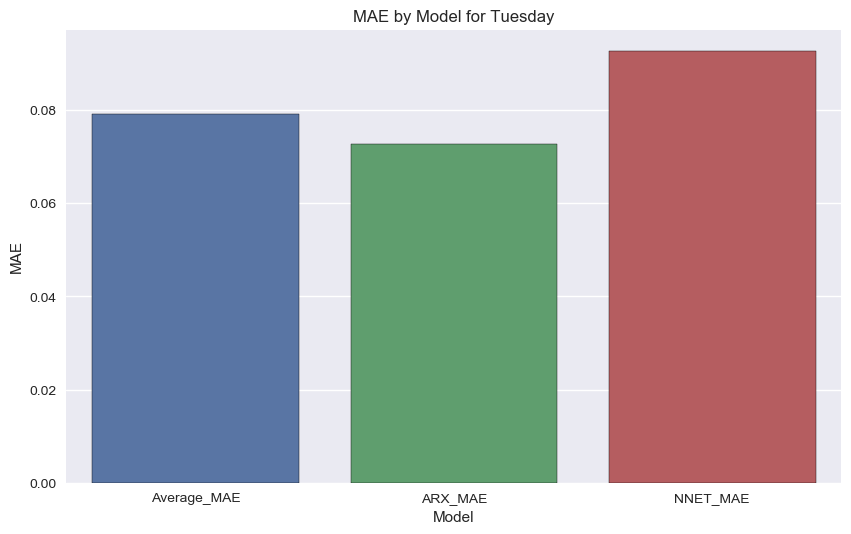

In [51]:
Plot_MAE(1,'Tuesday',MAE_df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


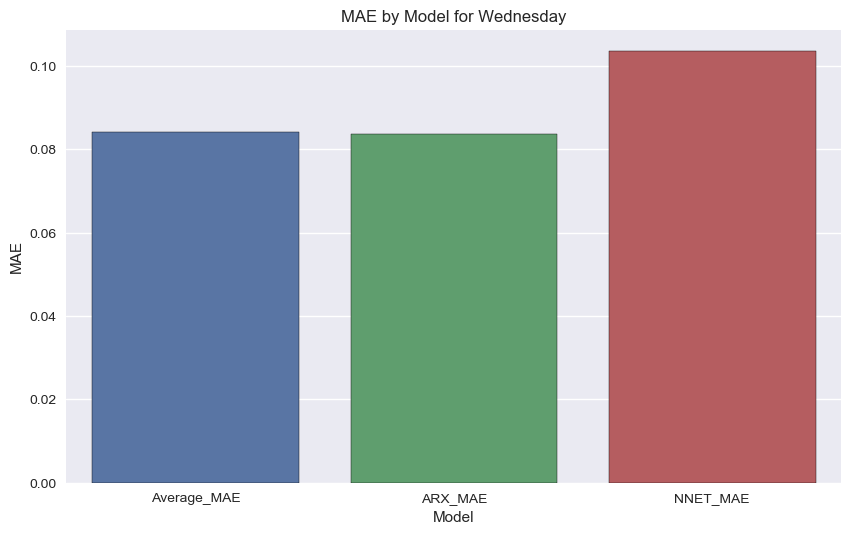

In [52]:
Plot_MAE(2,'Wednesday',MAE_df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


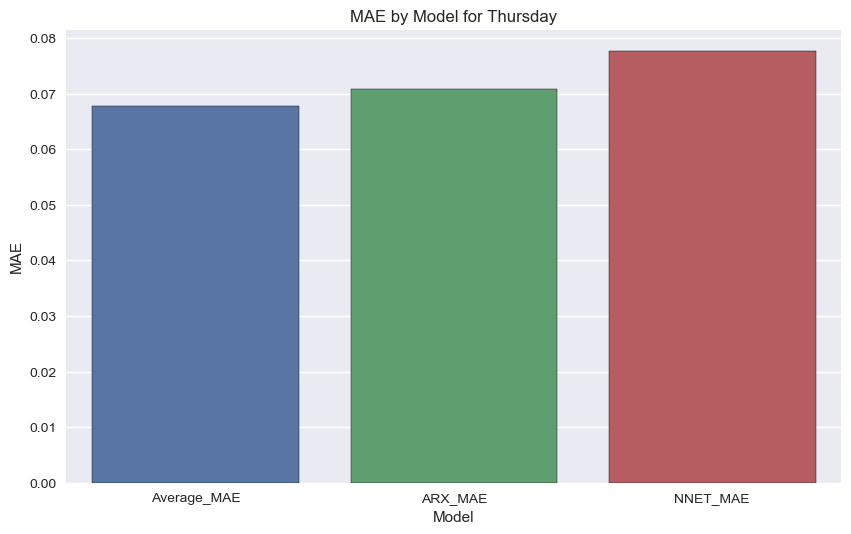

In [53]:
Plot_MAE(3,'Thursday',MAE_df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


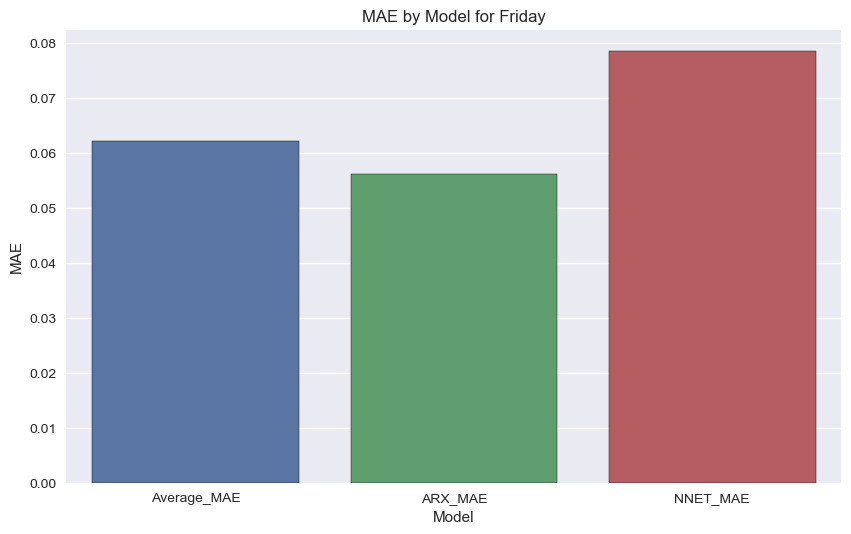

In [54]:
Plot_MAE(4,'Friday',MAE_df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


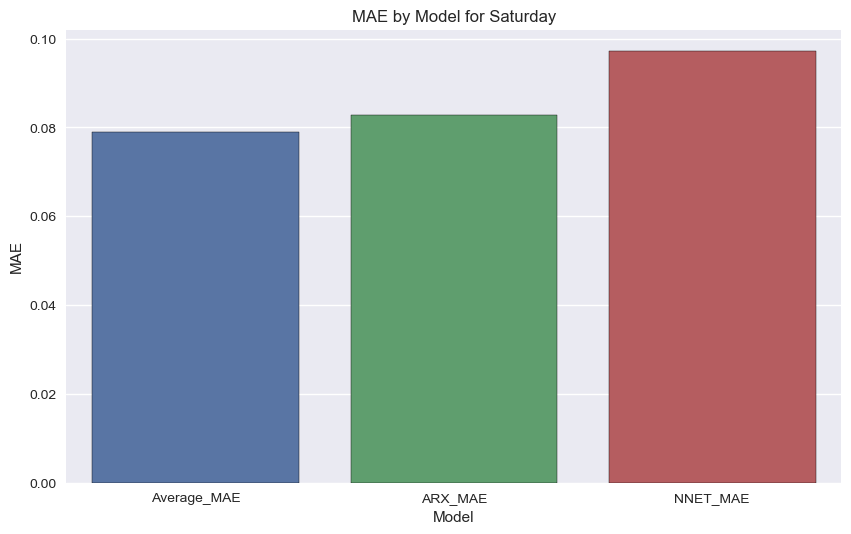

In [55]:
Plot_MAE(5,'Saturday',MAE_df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


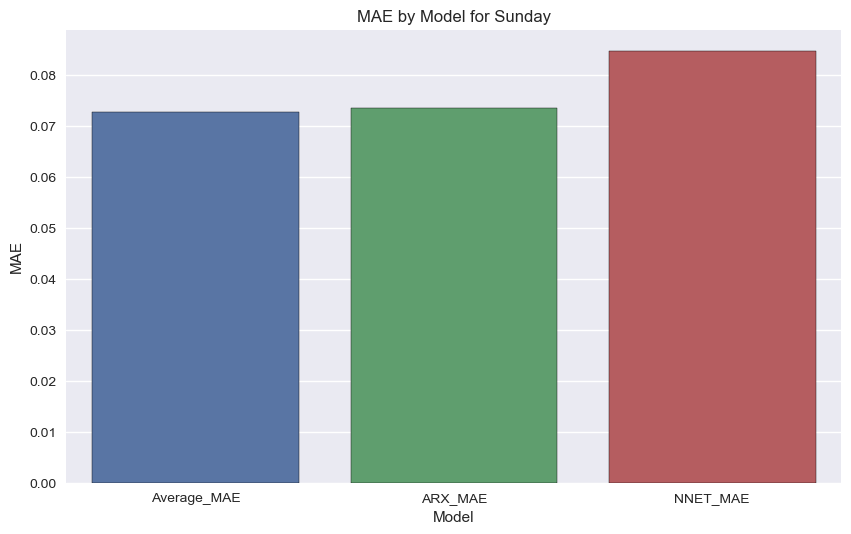

In [56]:
Plot_MAE(6,'Sunday',MAE_df)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


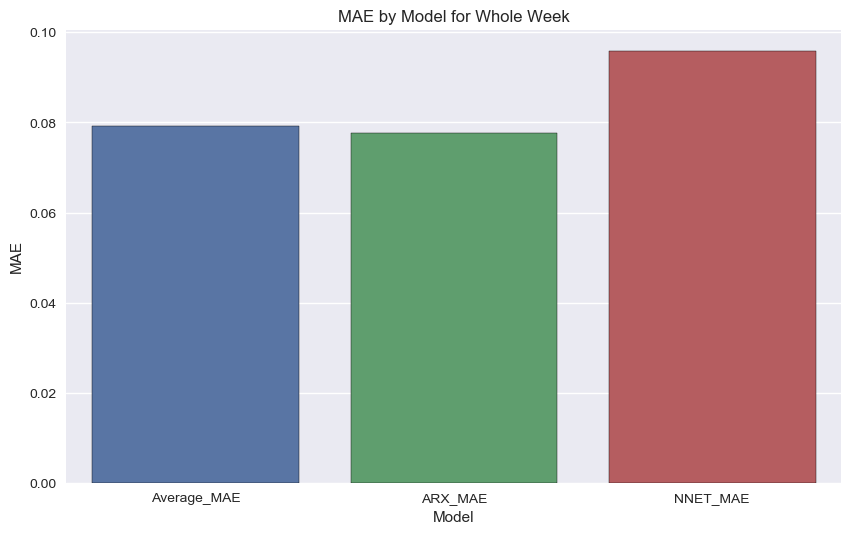

In [57]:
plot_cols = ['Average_MAE','ARX_MAE','NNET_MAE']
dow_df = MAE_df.loc[MAE_df['Day of Week']][plot_cols].mean()
sns.barplot(x=plot_cols,y=dow_df.values.reshape(3,))
plt.xlabel('Model')
plt.ylabel('MAE')
plt.title('MAE by Model for Whole Week')
plt.show()

In [58]:
normalized_date_df.to_csv('Normalized_Date.csv',index=False)

In [59]:
test_data.to_csv('Final_Test_data.csv',index=False)